### Line-Plane Intersection

In [2]:
def linePlaneIntersection(lineDir, linePt, planeDir, planePt):
    lineDir = vector(lineDir)
    linePt = vector(linePt)
    planeDir = vector(planeDir)

    return linePt + ((planePt - linePt).dot_product(planeDir)/lineDir.dot_product(planeDir))*lineDir

### Parallel Projection

In [7]:
# 3D Version

from sage.plot.colors import *

# Parallel projection to a plane
def shadow(rayDir, objPt, planeDir, planePt):
    return linePlaneIntersection(rayDir, objPt, planeDir, planePt)

rayDir = vector([1, 2, -1])
planeDir = vector([0, 0, 1])
planePt = vector([0, 0, 0])

# Parametric equations of a spiral
def spring(t):
    x = cos(t)
    y = sin(t)
    z = t/(5*pi)
    
    return vector((x, y, z))

# 3D objects to be rendered
t = var('t')
plane = polygon([(10, 10, 0), (-10, 10, 0), (-10, -10, 0), (10, -10, 0)], color = white, alpha = 0.5)
springObject = parametric_plot3d(spring(t), (t, 0, 20*pi), thickness = 2, color = red.darker(0.5), plot_points = 300)
lightrays = sum([arrow(spring(t), shadow(rayDir, spring(t), planeDir, planePt), color = yellow) for t in sxrange(0, 20*pi, 20*pi/100)])
springShadow = parametric_plot3d(shadow(rayDir, spring(t), planeDir, planePt), (t, 0, 20*pi), thickness = 2, color = black, plot_points = 300)

# Rendering procedure
objects = springObject + plane + springShadow + lightrays
objects.show(xmin = -6, xmax = 6, ymin = -6, ymax = 6, zmin = -1, zmax = 3, frame = false, aspect_ratio = 1, figsize = 10)

Graphics3d Object

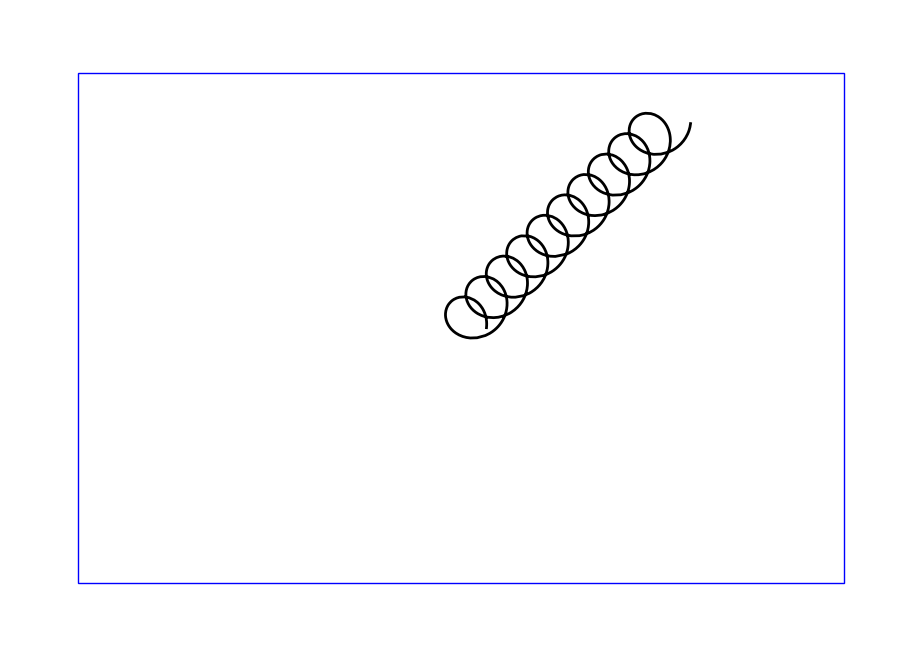

In [3]:
# 2D Version

from sage.plot.colors import *

# Parallel projection to a plane
def shadow(rayDir, objPt, planeDir, planePt):
    return linePlaneIntersection(rayDir, objPt, planeDir, planePt)

rayDir = vector([1, 1, -0.5])
planeDir = vector([0, 0, 1])
planePt = vector([0, 0, 0])

# Parametric equations of a spiral
def spring(t):
    x = cos(t)
    y = sin(t)
    z = t/(5*pi)
    
    return vector((x, y, z))

# 3D objects to be rendered
t = var('t')
plane = polygon([(15, 10), (-15, 10), (-15, -10), (15, -10)], color = white, edgecolor = blue)
springShadow = parametric_plot(shadow(rayDir, spring(t), planeDir, planePt)[:-1], (t, 0, 20*pi), thickness = 2, color = black, plot_points = 300)

# Rendering procedure
objects = plane + springShadow
objects.show(xmin = -17, xmax = 17, ymin = -12, ymax = 12, frame = false, aspect_ratio = 1, figsize = 10, axes = false)